In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import os
import random

In [2]:
!pwd

/home/bob/code/marcin-sobocinski/mlchartist/notebooks/companies_clusters


====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**



**_See Notebook `Table of content` for good understanding about what this notebook is doing when ran_**

====================================================================================================

# Anaysis of Companies Age from `nasdaq_us_stats.xls`

In [3]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../../raw_data/metadata/nasdaq_us_stats.xls')

In [4]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [5]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [6]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

## Company age classification

In [7]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [8]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

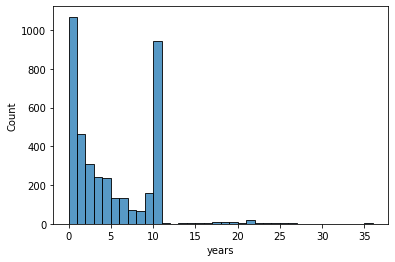

In [9]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [10]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


## Classification Results

<AxesSubplot:xlabel='years', ylabel='Count'>

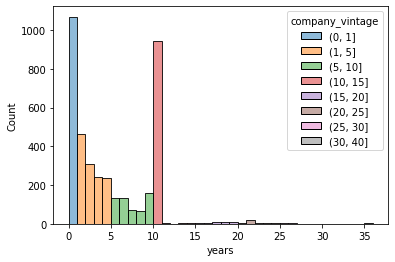

In [12]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')
#plt.savefig('companies_age_classification.pdf', dpi=1200)

In [13]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

### Saving List of Companies Name via `joblib`

In [14]:
stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['years']                                            # <=> ['days']/365
    st = row['stock'].replace('.US', '')
    
    #print(idx, x, row['stock'])
    if x <= 1 : stocks_bin_1.append(st)
    elif x > 1 and x <= 5: stocks_bin_2.append(st)
    elif x > 5 and x <= 10: stocks_bin_3.append(st)
    elif x > 10 and x <= 15: stocks_bin_4.append(st)        
    elif x > 15 and x <= 20: stocks_bin_5.append(st)        
    elif x > 20 and x <= 25: stocks_bin_6.append(st)        
    elif x > 25 and x <= 30: stocks_bin_7.append(st)        
    elif x > 30: stocks_bin_8.append(st)
    
print(f"Number of companies with less than a year of history: {len(stocks_bin_1)}")
print(f"Number of companies with between a year and 5 years of history: {len(stocks_bin_2)}")    
print(f"Number of companies with between 5 years and 10 years of history: {len(stocks_bin_3)}")
print(f"Number of companies with between 10 years and 15 years of history: {len(stocks_bin_4)}")
print(f"Number of companies with between 15 years and 20 years of history: {len(stocks_bin_5)}")
print(f"Number of companies with between 20 years and 25 years of history: {len(stocks_bin_6)}")
print(f"Number of companies with between 25 years and 30 years of history: {len(stocks_bin_7)}")
print(f"Number of companies with more than 30 years of history: {len(stocks_bin_8)}")

stock_bins = [stocks_bin_1, stocks_bin_2, stocks_bin_3,
              stocks_bin_4, stocks_bin_5, stocks_bin_6,
              stocks_bin_7, stocks_bin_8]

Number of companies with less than a year of history: 1069
Number of companies with between a year and 5 years of history: 1252
Number of companies with between 5 years and 10 years of history: 564
Number of companies with between 10 years and 15 years of history: 950
Number of companies with between 15 years and 20 years of history: 32
Number of companies with between 20 years and 25 years of history: 37
Number of companies with between 25 years and 30 years of history: 13
Number of companies with more than 30 years of history: 4


In [15]:
stock_bins

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

❗❗❗**You should check the path you want to save the `stock_bins` list**❗❗❗

(The `metadata` directory is where I saved the `nasdaq_us_stats.xls` csv file of Ian)

In [16]:
joblib.dump(stock_bins, '../../raw_data/metadata/tickers_per_history_lenght__list')

['../../raw_data/metadata/tickers_per_history_lenght__list']

In [17]:
stocks_tickers = joblib.load('../../raw_data/metadata/tickers_per_history_lenght__list')
stocks_tickers

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

# Modeling Companies per Vintage - (0, 1] - The youngest ones

## Functions definitions & Imports

### `precise_stocks_selector_local()`

In [18]:
from termcolor import colored

def precise_stocks_selector_local(tickers_list=[], path_files='../../raw_data/processed/',
                                  random_sample=False, num_samp = 2, verbose=1):
    """
    Returns a concatened DataFrame of the stocks data which tickers' list were passed
    
    If random_sample = True, return a DataFrame with random sample of stocks from the tickers' list passed
    
    Example:
    INPUT: ['AEP', 'GT', 'INTC', 'PEP']
    OUTPUT: df.tickers.unique() ==> ['GT', 'INTC']
   
    """
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        
    t = []
    for ticker in tickers_list:
        ticker = f"{ticker}.csv".lower()
        t.append(ticker)
    tickers_list = t
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        print()
        print()
    
    if verbose >= 1:
        print(colored(f"****** Starting browsing the '{path_files}' directory ******", 'magenta'))
        
    filenames = []
    missing_stock_csv = []

    
    if random_sample:
        for file in os.listdir(path_files):
            if file.endswith('.csv'):
                if file in tickers_list:
                    filenames.append(file)
        
        for ticker in tickers_list:
            #print(ticker)
            #print(missing_stock_csv)
            if ticker not in filenames:
                missing_stock_csv.append(ticker)
                print(colored(f"{ticker} missing", 'red'))
            else:
                pass
        
        #print(missing_stock_csv)
        
        for missed in missing_stock_csv:
            if missed not in tickers_list:
                missing_stock_csv.remove(missed)
        #print(missing_stock_csv)
        
        if len(filenames) < num_samp:
            print(colored('\nSample size bigger that nuber of companies available\n','red'))
        else:
            sample = random.sample(filenames, num_samp)
            
        if verbose >= 1:
            print(colored("\n   *** Complete sampling ***", 'green'))
            
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting stocks DataFrame creation the sample ******", 'magenta'))
        
        dfs = []

        for ticker in sample:
            ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
            dfs.append(ticker_df)
            if verbose == 2:
                print(colored(f"{ticker} DataFrame created", 'yellow'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
            
            
    else: 
        for file in os.listdir(path_files):
            if (file.endswith('.csv')):
                filenames.append(file)
                #print(f"{file}")
        
        if verbose >= 1:
            print(colored("\n   *** Complete file selection ***", 'green'))
        
        dfs = []
        
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"****** Starting stocks DataFrame creation the sample ******", 'magenta'))
      
        for ticker in tickers_list:
            if ticker in filenames:
                #print(f"{ticker}")
                ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
                dfs.append(ticker_df)
                if verbose == 2:
                    print(colored(f"{ticker} DataFrame created", 'yellow'))
            else:
                missing_stock_csv.append(ticker)
                print(colored(f"\n{ticker} missing", 'red'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
    
    
    if len(missing_stock_csv) !=0:
        
        print(colored("""\n\n##### Problematic Issue: following stocks not in local database! #####""", "red"))
        print(colored(f"Number of missed stocks: {len(missing_stock_csv)}", "red"))
        print(colored(f"""\n{missing_stock_csv}""", "red"))
    
    try:
        return pd.concat(dfs)
    except ValueError:
        return dfs

### Preprocessing Functions

In [19]:
from sklearn.preprocessing import StandardScaler

def std_scaler(train_set, test_set=0, fit=True, transform=True):
    """
    Scale the data with SKlearn StandardScaler
    
    Fit (if fit) the scaler on train and transform it (if transform) train_set
        and test_set (if test_set and (fit and transform))
    """
    
    scaler = StandardScaler()
    
    if len(test_set)!=0 and len(train_set)!=0:
        col_to_scale_df = test_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_test_df = test_set
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

        for col in col_to_scale:
            if fit and transform:
                scaler.fit(train_set[[col]])
                scaled_test_df[col] = scaler.transform(scaled_test_df[[col]])
        
        return scaled_train_df, scaled_test_df
    
    
    elif len(train_set)!=0:
        col_to_scale_df = train_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

                if transform:
                    scaled_train_df[col] = scaler.transform(scaled_train_df[[col]])
        return scaled_train_df

In [20]:
#Marcin's Function

def build_input_arrays(df, time_window=5, stride=3, input_cols=['RSI', 'Stochastic', 'Stochastic_signal', 'ADI',
       'OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff',
       'MACD_signal'] , target_col='5TD_return'):
    output_array = []
    target_array = []
    df_sorted = df.sort_values('date', ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)
    for row in range(0, len(df), stride):
        df_slice = df_sorted.iloc[row: row + time_window]
        if df_slice.shape[0]==time_window:
            output_array.append(np.array(df_slice[input_cols].values))
            target_array.append(df_slice[target_col].iloc[0])
    return np.array(output_array), np.array(target_array)

In [21]:
#Ian's Function

def train_test_split(df, test_set_size='3Y'):
    """
    Split the preprocessed stock data file into a train and test dataset
    INPUT: the dataframe to be split, and size of the test set in months or years ('3M' or '2Y')
    OUTPUT: returns a train_set and test_set dataframe, index is set to the date
    
    EXAMPLE: train_set, test_set = train_test_split(input_df, '3Y')
    """
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))
    test_set = df.sort_values(by="date",ascending=True).set_index("date").last(test_set_size)
    train_set = df.drop(df.tail(len(test_set)).index).set_index("date")
    test_set.reset_index(inplace=True)
    train_set.reset_index(inplace=True)
    return train_set, test_set

In [22]:
def thresholds_encoding(df, r5d=0.0006, same_thresholds=True, r10d=0.0012, r20d=0.0024):
    """
    Binary encode the 5, 10 and 20 days return columns according to the thresholds
    
    INPUT: dataframe with '5TD_return', '10TD_return' and '20TD_return' columns
    OUTPUT: dataframe with binary encoded aforementionned columns
    
    If the thresolds returns are the same on a yearly basis for the different period use:
                r10d = r5d * 2 
            and
                r20d = r10d * 2
            keep same_thresholds=True
        Otherwise, define manually r10d and r20d
    """
    wk_df = df.copy()
    
    if same_thresholds:
        r10d = r5d * 2
        r20d = r10d * 2
    
    wk_df['5TD_return'] = wk_df['5TD_return'].apply(lambda x: 1 if x > r5d else 0)
    wk_df['10TD_return'] = wk_df['10TD_return'].apply(lambda x: 1 if x > r10d else 0)
    wk_df['20TD_return'] = wk_df['20TD_return'].apply(lambda x: 1 if x > r20d else 0)
    
    return wk_df

### Visualisation Functions

In [23]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

### Model Saving Functions

In [24]:
def runs_history_loading(name='charles', vintage='0_1', path_files='models_histories'):
    
    filenames = []
    
    run_history = f"{name}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if run_history in filenames:
        print("Previous models scores:\n",joblib.load(path_files+'/'+run_history))
        return joblib.load(path_files+'/'+run_history)
    
    else:
        print("No previous models scores found\nReturning uncomplete list: [('tickers', ['loss', 'precision', 'accuracy'])]")
        return [('tickers', ['loss', 'precision', 'accuracy'])]

In [25]:
def runs_history_saving(score_file, vintage='0_1', author='charles', path_files='models_histories'):
    filenames = []
    
    run_history = f"{author}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if f"{author}_old_cie_model_history" in filenames:
        print("Previous models scores found:\n", joblib.load(path_files+'/'+run_history))
        confirmation = input(prompt="""You are about to save over the previous history, which will replace it by your new history.
        Are you sure you want to do that? (Y/n)""")
        
        if confirmation =='Y':
            joblib.dump(path_files+'/'+run_history)
            print("History Saving Complete!")
            print(f"File saved as: {author}_companies_{vintage}_model_history")
            print(f"File location:{path_files}")            
            
        else:
            print("History Saving Aborted!")
    
    else:
        joblib.dump(score_file, path_files+'/'+run_history)
        print("History Saving Complete!")
        print(f"File saved as: {author}_companies_{vintage}_model_history")
        print(f"File location:{path_files}")

## Preprocessing

### Importing the (0,1] Companies Sample

In [26]:
companies_0_1 = stocks_tickers[0]
companies_0_1

['AACQ',
 'AACQU',
 'AACQW',
 'ABCL',
 'ABCM',
 'ABNB',
 'ABST',
 'ACAC',
 'ACACU',
 'ACACW',
 'ACAM',
 'ACAMU',
 'ACAMW',
 'ACCD',
 'ACEV',
 'ACEVU',
 'ACEVW',
 'ACKIU',
 'ACTC',
 'ACTCU',
 'ACTCW',
 'ADERU',
 'ADILW',
 'ADOC',
 'ADOCR',
 'ADOCU',
 'ADOCW',
 'ADTX',
 'ADV',
 'ADVWW',
 'ADXN',
 'AEACU',
 'AEPPZ',
 'AFBI',
 'AFIB',
 'AFINO',
 'AFRM',
 'AGBA',
 'AGBAR',
 'AGBAU',
 'AGBAW',
 'AGC',
 'AGCUU',
 'AGCWW',
 'AGNCO',
 'AGNCP',
 'AHAC',
 'AHACU',
 'AHACW',
 'AIH',
 'AIRTP',
 'AIRTW',
 'AKICU',
 'AKU',
 'AKUS',
 'ALAC',
 'ALACR',
 'ALACU',
 'ALGM',
 'ALGS',
 'ALRS',
 'ALTUU',
 'ALVR',
 'ALXO',
 'AMCIU',
 'AMCIW',
 'AMHC',
 'AMHCU',
 'AMHCW',
 'AMST',
 'AMTI',
 'AMYT',
 'ANDA',
 'ANDAR',
 'ANDAU',
 'ANDAW',
 'ANNX',
 'ANPC',
 'AOUT',
 'API',
 'APRE',
 'APXT',
 'APXTU',
 'APXTW',
 'ARBG',
 'ARBGU',
 'ARBGW',
 'ARKO',
 'ARKOW',
 'ARQT',
 'ARRY',
 'ARTLW',
 'ARYA',
 'ASLE',
 'ASLEW',
 'ASO',
 'ATCXW',
 'ATHA',
 'ATNF',
 'AUBAP',
 'AUVI',
 'AVCTW',
 'AVGOP',
 'AVIR',
 'AVO',
 'AYLA',


### (Security autobreak)

In [27]:
#breaking_auto_run = #Bug on purpose: you might want to look at the companies (randomly) selected below

In [28]:
stocks_0_1_df = precise_stocks_selector_local(tickers_list=companies_0_1, random_sample=True, num_samp = 1, verbose=1)

****** Starting browsing the '../../raw_data/processed/' directory ******
aacqu.csv missing
abcl.csv missing
abnb.csv missing
abst.csv missing
acacu.csv missing
acacw.csv missing
acamu.csv missing
acevu.csv missing
ackiu.csv missing
actcu.csv missing
actcw.csv missing
aderu.csv missing
adoc.csv missing
adocr.csv missing
adocu.csv missing
adocw.csv missing
adtx.csv missing
aeacu.csv missing
afbi.csv missing
afino.csv missing
afrm.csv missing
agbau.csv missing
agcuu.csv missing
agcww.csv missing
ahacu.csv missing
ahacw.csv missing
akicu.csv missing
aku.csv missing
akus.csv missing
alacu.csv missing
algs.csv missing
alrs.csv missing
altuu.csv missing
amciu.csv missing
amhcu.csv missing
amst.csv missing
amyt.csv missing
andau.csv missing
annx.csv missing
aout.csv missing
apxt.csv missing
apxtu.csv missing
arbg.csv missing
arbgu.csv missing
arbgw.csv missing
arko.csv missing
arkow.csv missing
arqt.csv missing
avir.csv missing
bcab.csv missing
bcypu.csv missing
bdsx.csv missing
bdtx.csv miss

### Companies (randomly) selected

In [29]:
stocks_0_1_df.ticker.unique()

array(['ANDAR'], dtype=object)

### Setting date to `datetime` type

In [30]:
stocks_0_1_df['date'] = pd.to_datetime(stocks_0_1_df['date'])

### Encoding the Returns

In [31]:
clean_stocks_0_1_df = thresholds_encoding(stocks_0_1_df)
clean_stocks_0_1_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,ANDAR,2019-05-02,37.163367,13.419913,7.676768,84858.067574,74670,0.024504,22.236288,39.405517,39.725620,-0.014385,-0.010323,-0.004062,1,1,1
1,ANDAR,2019-05-06,52.742971,68.586387,28.922735,84858.067574,75670,0.026325,21.775882,47.409059,34.478515,-0.011275,-0.005771,-0.005504,1,0,0
2,ANDAR,2019-05-07,50.069173,58.115183,46.707161,84858.067574,75470,0.025159,21.070673,46.097637,36.290960,-0.009508,-0.003203,-0.006305,1,0,0
3,ANDAR,2019-05-08,50.069173,58.115183,61.605585,84858.067574,75670,0.023362,20.415836,46.097637,36.290960,-0.008015,-0.001368,-0.006647,1,0,0
4,ANDAR,2019-05-09,47.288869,47.643979,54.624782,84858.067574,75470,0.022407,19.508197,44.664739,38.271290,-0.007552,-0.000724,-0.006828,0,0,0
5,ANDAR,2019-05-15,59.421877,82.683983,62.814382,88525.845352,82072,0.027235,20.117628,52.331177,29.410597,-0.003114,0.002971,-0.006085,0,0,0
6,ANDAR,2019-05-17,59.421877,82.683983,71.003981,91025.845352,84572,0.028147,20.683528,47.110633,26.476605,0.000398,0.005187,-0.004789,0,0,0
7,ANDAR,2019-05-20,59.421877,82.683983,82.683983,91625.845352,85172,0.027565,21.209006,44.709010,25.126870,0.003145,0.006347,-0.003202,0,0,0
8,ANDAR,2019-05-21,59.421877,82.683983,82.683983,98525.845352,92072,0.030596,20.194755,37.502863,32.589726,0.005262,0.006771,-0.001509,0,0,0
9,ANDAR,2019-05-24,45.373969,39.393939,68.253968,98525.845352,91572,0.031982,19.252951,33.366019,28.994837,0.002871,0.003504,-0.000633,0,0,1


### Getting `X_train`, `y_train`, `X_test`, `y_test`

In [32]:
train, test = train_test_split(clean_stocks_0_1_df, '1M')

In [33]:
train.shape

(209, 17)

In [34]:
test.shape

(16, 17)

### Scaling train and transforming test

In [35]:
train, test = std_scaler(train, test)

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [36]:
X_train, y_train = build_input_arrays(train)
X_test, y_test = build_input_arrays(test)

## Model

### Model Initialisation

In [37]:
X_train.shape[1:]

(5, 12)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision

precision = Precision()


optim = RMSprop(learning_rate=0.0001)

def init_model(X_train):
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.0001)
    
    model.add(layers.LSTM(200, return_sequences=True, input_shape=X_train.shape[1:], activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='tanh', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='tanh', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(25, activation='relu'))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [39]:
model = init_model(X_train)

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.25,
          callbacks=[es]
         )

Epoch 1/500
7/7 [==============================] - 1s 128ms/step - loss: 3.2496 - precision: 0.4583 - accuracy: 0.4902 - val_loss: 3.1202 - val_precision: 0.6667 - val_accuracy: 0.7222
Epoch 2/500
7/7 [==============================] - 0s 22ms/step - loss: 3.1375 - precision: 0.4706 - accuracy: 0.5098 - val_loss: 3.1138 - val_precision: 0.6667 - val_accuracy: 0.7222
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 3.2540 - precision: 0.3889 - accuracy: 0.4510 - val_loss: 3.1087 - val_precision: 0.6667 - val_accuracy: 0.7222
Epoch 4/500
7/7 [==============================] - 0s 22ms/step - loss: 3.1306 - precision: 0.5882 - accuracy: 0.5882 - val_loss: 3.1034 - val_precision: 0.6667 - val_accuracy: 0.7222
Epoch 5/500
7/7 [==============================] - 0s 21ms/step - loss: 3.1467 - precision: 0.5500 - accuracy: 0.5686 - val_loss: 3.0972 - val_precision: 0.6667 - val_accuracy: 0.7222
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 3.0621 

Epoch 45/500
7/7 [==============================] - 0s 21ms/step - loss: 2.9847 - precision: 0.5769 - accuracy: 0.6078 - val_loss: 2.8695 - val_precision: 0.0000e+00 - val_accuracy: 0.6667
Epoch 46/500
7/7 [==============================] - 0s 20ms/step - loss: 2.9588 - precision: 0.6522 - accuracy: 0.6667 - val_loss: 2.8698 - val_precision: 0.0000e+00 - val_accuracy: 0.6667
Epoch 47/500
7/7 [==============================] - 0s 20ms/step - loss: 2.8824 - precision: 0.7391 - accuracy: 0.7451 - val_loss: 2.8762 - val_precision: 0.0000e+00 - val_accuracy: 0.6667
Epoch 48/500
7/7 [==============================] - 0s 21ms/step - loss: 2.8434 - precision: 0.7097 - accuracy: 0.7843 - val_loss: 2.8741 - val_precision: 0.0000e+00 - val_accuracy: 0.6667
Epoch 49/500
7/7 [==============================] - 0s 21ms/step - loss: 2.9351 - precision: 0.5833 - accuracy: 0.6078 - val_loss: 2.8723 - val_precision: 0.0000e+00 - val_accuracy: 0.6667
Epoch 50/500
7/7 [==============================] - 0s 

### Model Evalutation

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred.shape

(4, 1)

In [42]:
y_test.sum()/len(y_test)

0.75

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 2.9250 - precision: 0.7500 - accuracy: 0.7500


[2.924971342086792, 0.75, 0.75]

### Model Score Saving

In [44]:
model_runs_history = runs_history_loading()

Previous models scores:
 [('tickers', ['loss', 'precision', 'accuracy']), (['LEGN'], [3.175008773803711, 0.4000000059604645, 0.4000000059604645]), (['LMFAW'], [3.1875081062316895, 0.0, 0.0]), (['KBNTW'], [5.809561729431152, 0.4000000059604645, 0.4000000059604645]), (['KYMR'], [3.1488096714019775, 0.75, 0.6000000238418579]), (['GOCO'], [3.1555283069610596, 0.4000000059604645, 0.4000000059604645]), (['KRKR'], [2.7700676918029785, 0.0, 1.0]), (['CCNEP'], [3.1147689819335938, 0.0, 0.6000000238418579])]


In [45]:
model_runs_history

[('tickers', ['loss', 'precision', 'accuracy']),
 (['LEGN'], [3.175008773803711, 0.4000000059604645, 0.4000000059604645]),
 (['LMFAW'], [3.1875081062316895, 0.0, 0.0]),
 (['KBNTW'], [5.809561729431152, 0.4000000059604645, 0.4000000059604645]),
 (['KYMR'], [3.1488096714019775, 0.75, 0.6000000238418579]),
 (['GOCO'], [3.1555283069610596, 0.4000000059604645, 0.4000000059604645]),
 (['KRKR'], [2.7700676918029785, 0.0, 1.0]),
 (['CCNEP'], [3.1147689819335938, 0.0, 0.6000000238418579])]

In [46]:
model_runs_history.append((list(stocks_0_1_df.ticker.unique()),model.evaluate(X_test, y_test)))

1/1 [==============================] - 0s 2ms/step - loss: 2.9250 - precision: 0.7500 - accuracy: 0.7500


In [47]:
runs_history_saving(model_runs_history)

History Saving Complete!
File saved as: charles_companies_0_1_model_history
File location:models_histories


## Comprehensive Model Test

model_result = list({'tickers':'', 'benchmark':'', 'loss':'', 'precision':'', 'accuracy':''})
#model_result = pd.DataFrame(columns=list(model_result))
#model_result['tickers'] = ''
#model_result['benchmark'] = ''
#model_result['loss'] = ''
#model_result['precision'] = ''
#model_result.append([['tick', 0.98, 0.5, 0.6, 0.8]])
model_result

In [48]:
#model_result =# [('tickers', 'benchmark', 'loss', 'precision', 'accuracy')]

In [49]:
def comprehensive_model_test(ticker_list, directory_path='stock_model_results', save_name='stocks_00-01_results',
                             broken_list_result=False, path_broken_list='stocks_00-01_results'):
    """
    Test for each stock the model realised in the current notebook
    !! You need to have your compiled model function `init_model()` defined or change this function !!
    !! Scaling and data['date'] to datetime made, more details in the source code !!
    
    Save locally ('directory_path/save_name') a DataFrame with these columns:
        ('tickers', 'benchmark', 'loss', 'precision', 'accuracy')
        
    If the function crashes you can set `broken_list_result` to true and make it run again from
        the last stock saved locally ('path_broken_list')
    
    """
    i=0
    
    if broken_list_result:
        model_result = joblib.load(f'{directory_path}/{save_name}')
        
    else:    
        model_result = pd.DataFrame(columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])

    for stock in ticker_list:

        if stock in model_result['tickers'].values:
            print(f'{stock} model results previously saved:')
            print(model_result.loc[model_result['tickers'] == stock])

        else:

            # Importing
            data = precise_stocks_selector_local(tickers_list=stock, verbose=0)
            #print(list(data))
            
            if len(data)!=0:

                # Preprocessing
                data['date'] = pd.to_datetime(data['date'])

                #data = std_scaler(data)
                data = thresholds_encoding(data)
                train, test = train_test_split(clean_stocks_0_1_df, '1M')

                if train.shape[0] == 0 or test.shape[0] == 0 :
                    print(f'!!! Issue with {stock}, check its train or test shape')
                else:
                    X_train, y_train = build_input_arrays(train)
                    X_test, y_test = build_input_arrays(test)

                    # Modeling
                    model = init_model(X_train)
                    model.fit(X_train, y_train, 
                              epochs=500, 
                              batch_size=8,
                              validation_split=0.25,
                              callbacks=[es],
                              verbose=0)

                    # Saving Result
                    benchmark = y_test.sum()/len(y_test)
                    result = model.evaluate(X_test, y_test, verbose=0)
                    
                    df = pd.DataFrame([[stock, benchmark, result[0], result[1], result[2]]],
                                      columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])
                    #df['tickers'] = stock
                    #df['benchmark'] = benchmark
                    #df['loss'] = result[0]
                    #df['precision'] = result[1]
                    #df['accuracy'] = result[2]
                    print(df)
                    
                    
                    updt_model_result = pd.concat([model_result, df])

                    print(f'Completed results for {ticker_list.index(stock)}/{len(ticker_list)} stocks')
                    
                    joblib.dump(updt_model_result, f'{directory_path}/{save_name}')
                    print(f"Progress saved here: '{directory_path}/{save_name}'")
                    
                    

                    #i+=1
                    #if i == 1:
                    #    break

In [ ]:
model_result = comprehensive_model_test(companies_0_1, broken_list_result=True)


a.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'a.csv']
  tickers  benchmark      loss  precision  accuracy
0    AACQ       0.75  3.092751   0.666667       0.5
Completed results for 0/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'a.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   AACQU       0.75  3.128701        0.0      0.25
Completed results for 1/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'a.csv', 'w.csv']
  tickers  benchmark     loss  precision  accuracy
0   AACQW       0.75  3.10883       0.75   

  tickers  benchmark      loss  precision  accuracy
0   ACTCW       0.75  3.082338       0.75      0.75
Completed results for 20/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   ADERU       0.75  3.063881       0.75      0.75
Completed results for 21/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   ADILW       0.75  3.130361        0.0      0.25
Completed results for 22/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing


##### Problematic Issue: following stocks not in local database! ###

  tickers  benchmark      loss  precision  accuracy
0     AGC       0.75  3.092929       0.75      0.75
Completed results for 41/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

u.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'u.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   AGCUU       0.75  3.021546       0.75      0.75
Completed results for 42/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

w.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'w.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   AGCWW       0.75  3.086501       0.75      0.75
Completed results for 43/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing


##### Problematic Is

  tickers  benchmark     loss  precision  accuracy
0    ALVR       0.75  3.07619       0.75      0.75
Completed results for 62/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'x.csv']
  tickers  benchmark      loss  precision  accuracy
0    ALXO       0.75  3.018134       0.75      0.75
Completed results for 63/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']
  tickers  benchmark     loss  precision  accuracy
0   AMCIU       0.75  3.10844        0.0      0.25
Completed results for 64/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local da

  tickers  benchmark      loss  precision  accuracy
0   APXTW       0.75  3.085856       0.75      0.75
Completed results for 83/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'b.csv']
  tickers  benchmark    loss  precision  accuracy
0    ARBG       0.75  3.0531       0.75      0.75
Completed results for 84/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

b.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'b.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   ARBGU       0.75  3.018074       0.75      0.75
Completed results for 85/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

b.csv missing

w.csv missing


##### Problematic 

  tickers  benchmark      loss  precision  accuracy
0    AVIR       0.75  3.097963       0.75      0.75
Completed results for 103/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'v.csv']
  tickers  benchmark      loss  precision  accuracy
0     AVO       0.75  3.079593       0.75      0.75
Completed results for 104/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

y.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'y.csv', 'a.csv']
  tickers  benchmark      loss  precision  accuracy
0    AYLA       0.75  3.039382       0.75      0.75
Completed results for 105/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

y.csv missing


##### Problematic Issue: f

  tickers  benchmark      loss  precision  accuracy
0    BIGC       0.75  3.074728       0.75      0.75
Completed results for 123/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'v.csv']
  tickers  benchmark      loss  precision  accuracy
0    BIVI       0.75  3.027026       0.75      0.75
Completed results for 124/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']
  tickers  benchmark      loss  precision  accuracy
0    BLCT       0.75  3.133445        0.0      0.25
Completed results for 125/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing


##### Problematic Issue: following stocks not in local database! 

  tickers  benchmark      loss  precision  accuracy
0   BRLIU       0.75  3.062641       0.75      0.75
Completed results for 144/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   BRLIW       0.75  3.197314        0.0      0.25
Completed results for 145/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']
  tickers  benchmark      loss  precision  accuracy
0     BRP       0.75  3.086441       0.75      0.75
Completed results for 146/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Num

  tickers  benchmark      loss  precision  accuracy
0    BTAQ       0.75  3.026348       0.75      0.75
Completed results for 166/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

t.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 4

['b.csv', 't.csv', 'a.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   BTAQU       0.75  2.985897       0.75      0.75
Completed results for 167/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

b.csv missing

t.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 4

['b.csv', 't.csv', 'a.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   BTAQW       0.75  3.007112       0.75      0.75
Completed results for 168/1069 stocks
Progress saved here: 'stock_model_results/stocks_0

  tickers  benchmark      loss  precision  accuracy
0   CAPAU       0.75  3.074621   0.666667       0.5
Completed results for 186/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'a.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   CAPAW       0.75  3.004587       0.75      0.75
Completed results for 187/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'
  tickers  benchmark      loss  precision  accuracy
0    CCCC       0.75  3.020858       0.75      0.75
Completed results for 188/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'
  tickers  benchmark      loss  precision  accuracy
0   CCNEP       0.75  3.016174       0.75      0.75
Completed results for 189/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'
  

  tickers  benchmark      loss  precision  accuracy
0   CHPMW       0.75  2.989404       0.75      0.75
Completed results for 212/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'
  tickers  benchmark      loss  precision  accuracy
0    CIIC       0.75  3.090501       0.75      0.75
Completed results for 213/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']
  tickers  benchmark      loss  precision  accuracy
0   CIICU       0.75  3.246273        0.0      0.25
Completed results for 214/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']
  tickers  benchmark      loss  precision  accuracy
0   CIICW       0.75  2.995215       0.75      0.75
Completed results for 215/

  tickers  benchmark      loss  precision  accuracy
0    COMS       0.75  3.109429   0.666667       0.5
Completed results for 236/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   COMSW       0.75  3.013597       0.75      0.75
Completed results for 237/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']
  tickers  benchmark      loss  precision  accuracy
0    CONX       0.75  3.049609       0.75      0.75
Completed results for 238/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

x.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Num

  tickers  benchmark      loss  precision  accuracy
0    CXDO       0.75  3.026933       0.75      0.75
Completed results for 258/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

y.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 't.csv']
  tickers  benchmark      loss  precision  accuracy
0    CYTH       0.75  3.064914       0.75      0.75
Completed results for 259/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

y.csv missing

t.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['y.csv', 't.csv', 'w.csv']
  tickers  benchmark      loss  precision  accuracy
0   CYTHW       0.75  3.033333       0.75      0.75
Completed results for 260/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

a.csv missing


##### Problematic Issue: f

  tickers  benchmark      loss  precision  accuracy
0    DGNS       0.75  3.027218       0.75      0.75
Completed results for 282/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['k.csv']
  tickers  benchmark      loss  precision  accuracy
0    DKNG       0.75  3.139255        0.0      0.25
Completed results for 283/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']
  tickers  benchmark      loss  precision  accuracy
0   DLCAU       0.75  3.071491   0.666667       0.5
Completed results for 284/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed s

  tickers  benchmark      loss  precision  accuracy
0    EBON       0.75  3.032969       0.75      0.75
Completed results for 304/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']
  tickers  benchmark      loss  precision  accuracy
0   ECOLW       0.75  3.093387   0.666667       0.5
Completed results for 305/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']
  tickers  benchmark      loss  precision  accuracy
0    ECOW       0.75  3.035171        1.0      0.75
Completed results for 306/1069 stocks
Progress saved here: 'stock_model_results/stocks_00-01_results'
  tickers  benchmark      loss  precision  accuracy
0    EDOC       0.75  3.056138       0.75      0.75
Completed results for 307/

In [50]:
model_result    # corrupted data see duplicates 'CMLFW' and 'CMPI' -> tickers unreliable
                # But values reliable once duplicates removed

In [51]:
#model_result = pd.DataFrame(columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])

In [52]:
model_result

,tickers,benchmark,loss,precision,accuracy
